In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# create some data using the linear regression formula

weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y(features and labels)
# without unsqueeze, errors will pop
X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight * X + bias


In [4]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train, X_test, y_test = X[:train_split], y[:train_split], X[train_split:], y[train_split:]

In [5]:
len(X_train), len(y_train), len(X_test)

(40, 40, 10)

In [6]:
def plot_prediction(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Prediction")

    plt.legend(prop={"size":14})



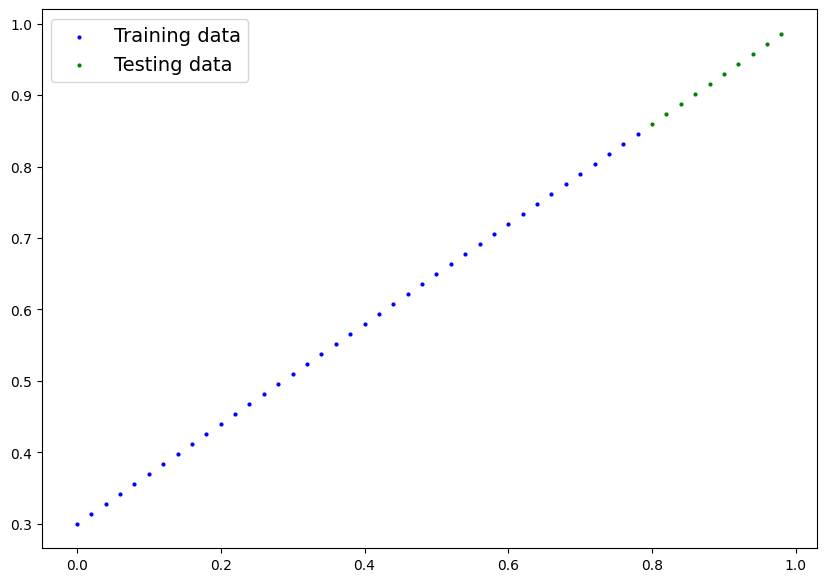

In [7]:
plot_prediction(X_train, y_train, X_test, y_test)

In [8]:
# build a pytorch linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() for creating model parameter
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)  
    
# set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
next(model_1.parameters()).device

device(type='cpu')

# training
for training we need:

    * loss function

    *optimizer

    *training loop

    *testing loop


In [10]:
# setting up loss function
loss_fn = nn.L1Loss() 

# set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [11]:
# training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    # forward pass
    y_pred = model_1(X_train)

    # calculate the loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # perform backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()


    # TESTING

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

        # print out what is happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [12]:
# evaluate model
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

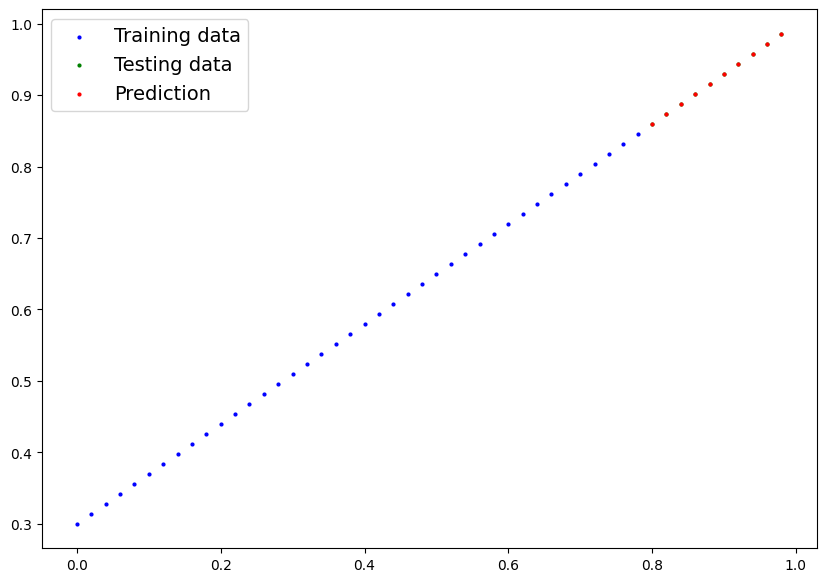

In [14]:
plot_prediction(predictions=test_pred)